In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
%matplotlib inline

import random as rand

In [2]:
# df = pd.read_csv(r'D:/cornell/Fall_21/ORIE 5741 big messy data/Project/SPARCS.csv')
df_original = pd.read_csv('SPARCS.csv')


feature_names = df_original.columns
feature_names
# for i in range(35):
#     print(str(i), "\t", str(feature_names[i]),"\t\t\t", str(type(df.iloc[0,i])))

/Users/ruiren/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['Id', 'Health_Service_Area', 'Hospital_County',
       'Operating_Certificate_Number', 'Facility_ID', 'Facility_Name',
       'Age_Group', 'Zip_Code_3_digits', 'Gender', 'Race', 'Ethnicity',
       'Length_of_Stay', 'Type_of_Admission', 'Patient_Disposition',
       'Discharge_Year', 'CCS_Diagnosis_Code', 'CCS_Diagnosis_Description',
       'CCS_Procedure_Code', 'CCS_Procedure_Description', 'APR_DRG_Code',
       'APR_DRG_Description', 'APR_MDC_Code', 'APR_MDC Description',
       'APR_Severity_of_Illness_Code', 'APR_Severity_of_Illness_Description',
       'APR_Risk_of_Mortality', 'APR_Medical_Surgical_Description',
       'Payment_Typology_1', 'Payment_Typology_2', 'Payment_Typology_3',
       'Birth_Weight', 'Abortion_Edit_Indicator',
       'Emergency_Department_Indicator', 'Total_Charges', 'Total_Costs'],
      dtype='object')

In [3]:
np.random.seed(35)
df = df_original.sample(frac = 1)

In [4]:
df_original.shape[0]

2544543

**Dataset in details**<br>
Our dataset has 2544543 rows and 35 columns, including the description of patients' age, race, location, payment methods and so on.

In [5]:
chosen_labels = [
    'Health_Service_Area',
    'Gender',
    'Age_Group',
    'Race',
    'CCS_Diagnosis_Description',
    'APR_Risk_of_Mortality',
    'APR_Severity_of_Illness_Description',
    'Zip_Code_3_digits',
    'Length_of_Stay'
]
payment_method = [
    'Payment_Typology_1',
    'Payment_Typology_2',
    'Payment_Typology_3'
]

In [6]:
for chosen_label in chosen_labels:
    df = df[~df[chosen_label].isna()]

In [7]:
df.shape

(2505787, 35)

In [8]:
df = df[~pd.isnull(df[payment_method]).all(axis=1)]

In [9]:
df.shape

(2505787, 35)

**Data-Preprocessing**<br>
1. Clean up the null data<br>
2. Data transformation<br>
3. Create new features

***Drop several columns (like the duplicated columns with same information)***may have some problems

In [10]:
#Drop irrelevant data
duplicated_labels = [
    #'CCS_Diagnosis_Code',
    #'CCS_Procedure_Code',
    #'APR_DRG_Code',
    #'APR_MDC_Code',
    #'APR_Severity_of_Illness_Code',
    'Facility_ID',
    'Birth_Weight'
]

In [11]:
df = df.drop(duplicated_labels, axis=1)

In [12]:
df.shape

(2505787, 33)

Row-Drop null data (already have)
Abortion Record == Y dropped

In [13]:
df = df[~df.Abortion_Edit_Indicator.eq("Y")]


Row-Drop meanless data
OOS “Out of State” in the zip code should be drop out (only considering NY)<br>

In [14]:
df = df.loc[df["Zip_Code_3_digits"] != "OOS"]
df.shape

(2434522, 33)

**Summary Statistics**<br>

In [15]:
cost=df['Total_Costs']
cost=df.Total_Costs

In [16]:
cost.describe()

count    2.434522e+06
mean     1.187579e+04
std      3.194961e+04
min      1.000000e-01
25%      3.574303e+03
50%      6.592105e+03
75%      1.260653e+04
max      3.231139e+07
Name: Total_Costs, dtype: float64

In [17]:
pd.isna(cost)

297756     False
82645      False
534928     False
1639749    False
452272     False
           ...  
347071     False
56300      False
179233     False
2475279    False
202441     False
Name: Total_Costs, Length: 2434522, dtype: bool

<AxesSubplot:>

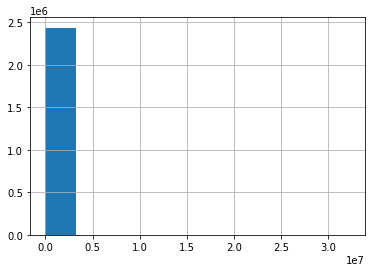

In [18]:
cost.hist()

<AxesSubplot:>

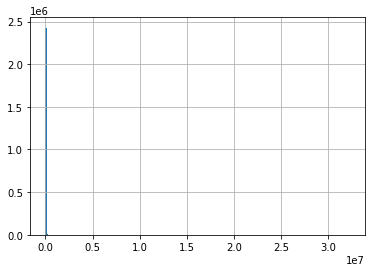

In [19]:
cost.hist(bins=200)

In [20]:
lower_cost = (cost < 99999)
lower_cost

297756     True
82645      True
534928     True
1639749    True
452272     True
           ... 
347071     True
56300      True
179233     True
2475279    True
202441     True
Name: Total_Costs, Length: 2434522, dtype: bool

In [21]:
cost99=df.where(lower_cost)

In [22]:
cost99.describe()

,Id,Operating_Certificate_Number,Discharge_Year,CCS_Diagnosis_Code,CCS_Procedure_Code,APR_DRG_Code,APR_MDC_Code,APR_Severity_of_Illness_Code,Total_Charges,Total_Costs
count,2.415281e+06,2.415281e+06,2415281.0,2.415281e+06,2.415281e+06,2.415281e+06,2.415281e+06,2.415281e+06,2.415281e+06,2.415281e+06
mean,1.267139e+06,4.987811e+06,2012.0,1.925981e+02,1.145786e+02,4.095756e+02,1.020500e+01,1.987635e+00,2.956794e+04,1.047646e+04
std,7.400038e+05,2.252027e+06,0.0,1.574750e+02,8.801578e+01,2.386172e+02,5.879949e+00,9.031890e-01,3.777617e+04,1.214835e+04
min,1.000000e+00,1.010000e+05,2012.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e-01,1.000000e-01
25%,6.241960e+05,2.951001e+06,2012.0,1.060000e+02,0.000000e+00,1.980000e+02,5.000000e+00,1.000000e+00,8.796450e+03,3.553150e+03
50%,1.255707e+06,5.904000e+06,2012.0,1.590000e+02,1.340000e+02,3.810000e+02,9.000000e+00,2.000000e+00,1.746858e+04,6.532590e+03
75%,1.923137e+06,7.002002e+06,2012.0,2.180000e+02,2.140000e+02,6.400000e+02,1.500000e+01,3.000000e+00,3.465700e+04,1.237041e+04
max,2.544543e+06,7.004010e+06,2012.0,6.700000e+02,2.310000e+02,9.520000e+02,2.500000e+01,4.000000e+00,1.071769e+06,9.999701e+04


Plot the histogram for all of the cost values

<AxesSubplot:>

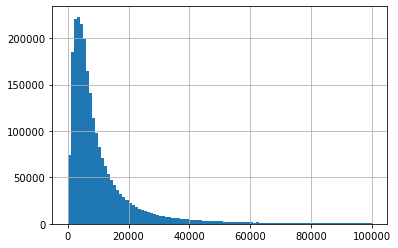

In [23]:
cost99.Total_Costs.hist(bins=100)

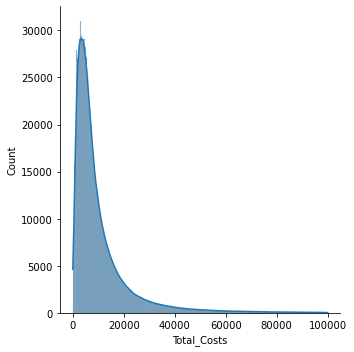

In [24]:
sns.displot(cost99.Total_Costs, kde=True)

In [25]:
cost99["Total_Costs+1"] = cost99.Total_Costs + 1

- Analyze the cost for patients in different genders

array([[<AxesSubplot:title={'center':'F'}>,
        <AxesSubplot:title={'center':'M'}>],
       [<AxesSubplot:title={'center':'U'}>, <AxesSubplot:>]], dtype=object)

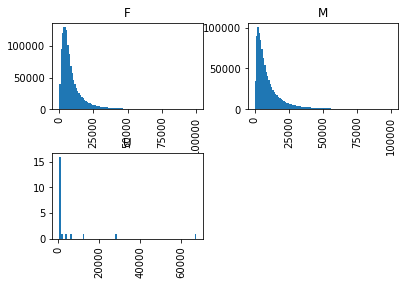

In [26]:
cost99["Total_Costs"].hist(by=cost99["Gender"], bins=100)

<AxesSubplot:xlabel='Total_Costs+1', ylabel='Count'>

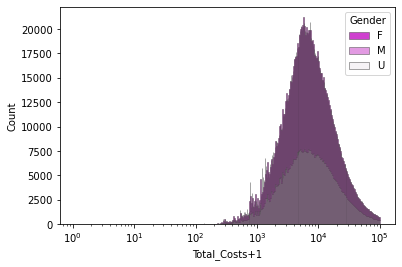

In [27]:
sns.histplot(
    cost99,
    x="Total_Costs+1", hue="Gender",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

- Not too clear, so another diagram is generated

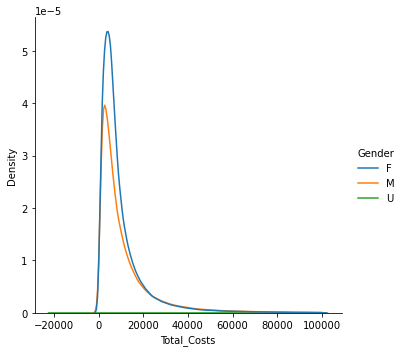

In [28]:
sns.displot(
    cost99,
    x="Total_Costs", hue="Gender",
    kind='kde'
)

Relationship between age and costs

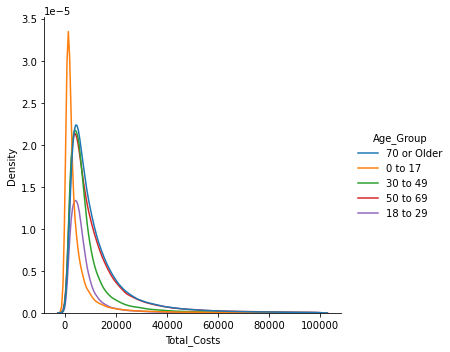

In [29]:
sns.displot(
    cost99,
    x="Total_Costs", hue="Age_Group",
    kind='kde'
)

Relationship between race and costs

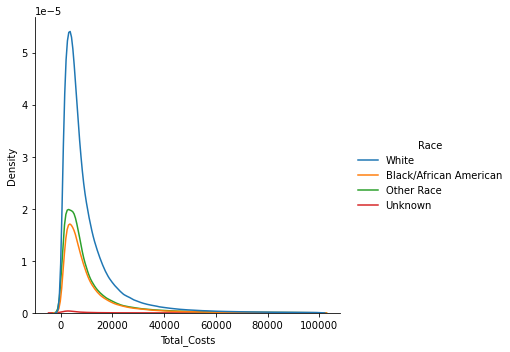

In [30]:
sns.displot(
    cost99,
    x="Total_Costs", hue="Race",
    kind='kde'
)

Then analyze the statistics of total charges

<AxesSubplot:>

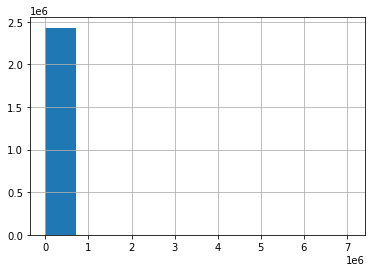

In [31]:
df.Total_Charges.hist()

In [32]:
charge=df['Total_Charges']
charge=df.Total_Charges
lower_charge = (charge < 99999)
lower_charge

297756      True
82645      False
534928      True
1639749     True
452272      True
           ...  
347071      True
56300       True
179233      True
2475279     True
202441      True
Name: Total_Charges, Length: 2434522, dtype: bool

In [33]:
charge99 = df.where(lower_charge)

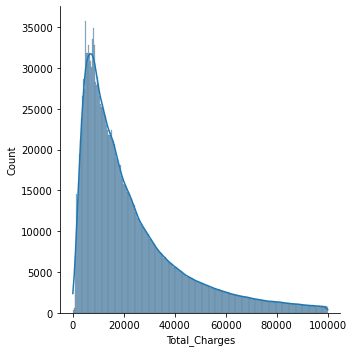

In [34]:
sns.displot(charge99.Total_Charges, kde=True)

- find the relationship between total charges and total costs

In [35]:
df.shape[0]
len(df)

2434522

In [36]:
df_array = np.asarray(df)

In [37]:
# make a small split
data_sampling_ratio = 0.01
rows_to_sample = int(round(data_sampling_ratio * df_array.shape[0]))
idx_rows_to_sample = rand.sample(list(range(len(df_array))), rows_to_sample)

df_small_array = df_array[idx_rows_to_sample, :]
df_small_array.shape

(24345, 33)

In [38]:
df_top = df.columns
df_top

Index(['Id', 'Health_Service_Area', 'Hospital_County',
       'Operating_Certificate_Number', 'Facility_Name', 'Age_Group',
       'Zip_Code_3_digits', 'Gender', 'Race', 'Ethnicity', 'Length_of_Stay',
       'Type_of_Admission', 'Patient_Disposition', 'Discharge_Year',
       'CCS_Diagnosis_Code', 'CCS_Diagnosis_Description', 'CCS_Procedure_Code',
       'CCS_Procedure_Description', 'APR_DRG_Code', 'APR_DRG_Description',
       'APR_MDC_Code', 'APR_MDC Description', 'APR_Severity_of_Illness_Code',
       'APR_Severity_of_Illness_Description', 'APR_Risk_of_Mortality',
       'APR_Medical_Surgical_Description', 'Payment_Typology_1',
       'Payment_Typology_2', 'Payment_Typology_3', 'Abortion_Edit_Indicator',
       'Emergency_Department_Indicator', 'Total_Charges', 'Total_Costs'],
      dtype='object')

In [39]:
df_small = pd.DataFrame(df_small_array, columns = df_top)
df_small

,Id,Health_Service_Area,Hospital_County,Operating_Certificate_Number,Facility_Name,Age_Group,Zip_Code_3_digits,Gender,Race,Ethnicity,...,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology_1,Payment_Typology_2,Payment_Typology_3,Abortion_Edit_Indicator,Emergency_Department_Indicator,Total_Charges,Total_Costs
0,1270371,New York City,Kings,7001037.0,SUNY Downstate Medical Center at LICH,70 or Older,112,M,Other Race,Not Span/Hispanic,...,Moderate,Moderate,Medical,Medicare,Medicaid,Self-Pay,N,Y,8887.0,5396.29
1,1164533,New York City,Bronx,7000006.0,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,104,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicaid,Self-Pay,NaN,N,Y,67907.6,13278.79
2,1737281,New York City,Manhattan,7002054.0,New York Presbyterian Hospital - New York Weil...,18 to 29,111,F,Other Race,Spanish/Hispanic,...,Moderate,Minor,Surgical,Medicaid,Medicaid,Self-Pay,N,Y,23236.79,7308.92
3,298045,Finger Lakes,Monroe,2754001.0,The Unity Hospital of Rochester,70 or Older,146,F,White,Not Span/Hispanic,...,Minor,Minor,Surgical,Medicare,Medicare,NaN,N,Y,16926.32,7602.05
4,2306794,Long Island,Nassau,2950002.0,Nassau University Medical Center,30 to 49,115,F,White,Spanish/Hispanic,...,Minor,Minor,Medical,Medicaid,Medicaid,Self-Pay,N,Y,2604.83,1377.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24340,1214076,New York City,Kings,7001009.0,Coney Island Hospital,30 to 49,112,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,N,Y,8726.09,11153.3
24341,1952460,New York City,Queens,7003003.0,Jamaica Hospital Medical Center,30 to 49,114,F,Black/African American,Not Span/Hispanic,...,Minor,Minor,Surgical,Medicaid,NaN,NaN,N,Y,44363.82,16505.02
24342,1908489,New York City,Queens,7003000.0,Elmhurst Hospital Center,18 to 29,114,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Medical,Medicaid,NaN,NaN,N,Y,3728.16,2663.13
24343,1171269,New York City,Bronx,7000006.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Moderate,Minor,Medical,Medicaid,Medicaid,Self-Pay,N,Y,9019.4,2448.35


<AxesSubplot:xlabel='Health_Service_Area', ylabel='Total_Charges'>

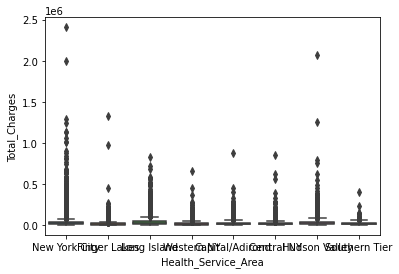

In [40]:
sns.boxplot(
    data = df_small,
    y="Total_Charges", x="Health_Service_Area"
)

**Feature Transform**<br>
Transform the string values ‘120 +’ at the Length of Stay columns to integer 120 <br>
***Need more explaination, like why do this transformation?***

In [41]:
los = df['Length_of_Stay'][df['Length_of_Stay'] == "120 +"].count()
los

1965

In [42]:
df['Length_of_Stay'] = df['Length_of_Stay'].replace(["120 +"], 120)

In [43]:
los = df['Length_of_Stay'][df['Length_of_Stay'] == 120].count()
df['Length_of_Stay'] = pd.to_numeric(df['Length_of_Stay'])

In [44]:
chosen_to_numeric = [
    'Total_Costs',
    'Zip_Code_3_digits',
    'Length_of_Stay'
]
for i in chosen_to_numeric:
    df[i] = pd.to_numeric(df[i])

one-hot encoding to categoratal features<br><br>
Gender: F / M / U (for unknown or unspecified)<br>
    'Age_Group',<br>
        'Race',<br>
    # 'CCS_Diagnosis_Description',<br>
    'APR_Risk_of_Mortality'<br>
    APR_Severity_of_Illness_Description<br>
    Health_Service_Area<br>

In [45]:
def onehot(column=None, col=None):
    return pd.get_dummies(df[column], prefix = column, dummy_na= ('NaN' in col))

In [46]:
cat_labels = [
        'Gender',
    'Age_Group',
        'Race',
    # 'CCS_Diagnosis_Description',
    'APR_Risk_of_Mortality',
    'APR_Severity_of_Illness_Description',
    'Health_Service_Area',
    'Zip_Code_3_digits'
]
cats_sets = [df.loc[:, label].fillna('NaN').unique() for label in cat_labels]

In [47]:
cat_vals1 = {} 
for i in range(len(cat_labels)):
    cat_vals1[i] = onehot(cat_labels[i], cats_sets[i]).iloc[:]
    # print(len(cat_vals1[i]))

<ipython-input-45-11f06453fe4d>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return pd.get_dummies(df[column], prefix = column, dummy_na= ('NaN' in col))


**下面没有做train/test改动**

In [48]:
# offset
num = len(cat_labels)
length = len(cat_vals1[0])
cat_vals = np.zeros(length)
cat_vals = cat_vals.reshape(length, 1)

for i in range(0, num):
    cat_vals = np.concatenate((cat_vals, cat_vals1[i]), axis=1)

In [49]:
cat_vals.shape

(2434522, 78)

In [50]:
stri = str(df.loc[:, 'Payment_Typology_1'][0]) + "&" + str(df.loc[:, 'Payment_Typology_2'][0]) + "&"+  str(df.loc[:, 'Payment_Typology_3'][0])

stri

'Blue Cross/Blue Shield&nan&nan'

In [51]:
df['Payment_Typology'] = df.apply(lambda x:'%s_%s_%s' % (x['Payment_Typology_1'],x['Payment_Typology_2'],x['Payment_Typology_3']),axis=1)

In [52]:
aaa = (df.loc[:, 'Payment_Typology'][285].replace('nan','').replace('\n','').split('_'))
aaa = set(filter(bool, aaa))
aaa

{'Blue Cross/Blue Shield', 'Medicare'}

In [53]:
def parse_str(string):
    my_list = (string).replace('nan','').replace('\n','').split('_')
    return set(filter(bool, my_list))

In [54]:
set_vals = df.loc[:, 'Payment_Typology'].apply(parse_str).iloc[:]

In [55]:
type1 = set_vals.explode().unique()

def manyhot(column=None, col=None):
    rowNum = len(column)
    data = {}
    col = type1
    for i in range(len(col)):
        data[col[i]] = [0] * rowNum
    temp = column
    temp = temp.reset_index(drop=True)
    for i in range(len(temp)):
        for eachHot in temp[i]:
            data[eachHot][i] += 1
    df_raw = pd.DataFrame(data, columns = col)
    df_raw = df_raw.set_index(column.index)
    return df_raw

In [56]:
set_vals = manyhot(set_vals, type1)

In [57]:
set_vals

,Medicare,Private Health Insurance,Blue Cross/Blue Shield,Self-Pay,Medicaid,Miscellaneous/Other,Federal/State/Local/VA,Unknown,"Managed Care, Unspecified",Department of Corrections
297756,1,0,0,0,0,0,0,0,0,0
82645,0,1,0,0,0,0,0,0,0,0
534928,1,0,1,1,0,0,0,0,0,0
1639749,0,0,0,0,1,0,0,0,0,0
452272,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
347071,0,0,0,0,1,0,0,0,0,0
56300,0,0,0,1,1,0,0,0,0,0
179233,1,0,0,1,0,0,0,0,0,0
2475279,0,1,0,0,1,0,0,0,0,0


In [58]:
set_vals.shape

(2434522, 10)

In [59]:
df.shape

(2434522, 34)

In [60]:
nums = df[['Length_of_Stay']]
nums.shape
# ((2434522,1))

(2434522, 1)

In [61]:
cat_vals.shape

(2434522, 78)

In [62]:
x = np.concatenate( (set_vals, cat_vals), axis = 1 )
# x = np.concatenate((nums, x), axis = 1)
print(x.shape)

(2434522, 88)


**Preliminary Analyses**<br>
the following section should be the prelimary analysis

**Train / Test Split**<br>
To make the 80 / 20 train test split, we shuffle the data and select the first 80% as the train data, with 20% held out for validation.

In [73]:
train_proportion = 0.8
n = len(x)
print('Size of dataset: ', str(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
t = int(train_proportion * n)
target = df[['Total_Costs']]
# the following variable records the features of examples in the training set
train_x = x[: t+1]
# the following variable records the features of examples in the test set
test_x = x[t+1 :]
# the following variable records the labels of examples in the training set
train_y = target[: t+1]
#print(train_y.shape)
# the following variable records the labels of examples in the test set
test_y = target[t+1 :]

Size of dataset:  2434522


In [83]:
print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(1947618, 88) (486904, 88)
(1947618, 1) (486904, 1)


In [132]:
data_sampling_ratio = 0.01
rand.seed(5741)
rows_to_sample = int(round(data_sampling_ratio * train_x.shape[0]))
idx_rows_to_sample = rand.sample(list(range(len(train_x))), rows_to_sample)

train_x_small = train_x[idx_rows_to_sample, :]
train_y_small = train_y.iloc[idx_rows_to_sample, :]

In [133]:
data_sampling_ratio = 0.01
rows_to_sample = int(round(data_sampling_ratio * test_x.shape[0]))
idx_rows_to_sample = rand.sample(list(range(len(test_x))), rows_to_sample)

test_x_small = test_x[idx_rows_to_sample, :]
test_y_small = test_y.iloc[idx_rows_to_sample, :]

In [134]:
print(train_x_small.shape, test_x_small.shape)
print(train_y_small.shape, test_y_small.shape)

(19476, 88) (4869, 88)
(19476, 1) (4869, 1)


In [135]:
# This function just computes the mean squared error
def MSE(y, pred):
    difference_array = np.subtract(y, pred)
    squared_array = np.square(difference_array)
    return squared_array.mean() 

# This function plots the main diagonal;for a "predicted vs true" plot with perfect predictions, all data lies on this line
def plotDiagonal(xmin, xmax):
    xsamples = np.arange(xmin,xmax,step=0.01)
    plt.plot(xsamples,xsamples,c='black')

# This helper function plots x vs y and labels the axes
def plotdata(x=None,y=None,xname=None,yname=None,margin=0.05,plotDiag=True,zeromin=False):
    plt.scatter(x,y,label='data')
    plt.xlabel(xname)
    plt.ylabel(yname)
    range_x = max(x) - min(x)
    range_y = max(y) - min(y)
    if plotDiag:
        plotDiagonal(min(x)-margin*range_x,max(x)+margin*range_x)
    if zeromin:
        plt.xlim(0.0,max(x)+margin*range_x)
        plt.ylim(0.0,max(y)+margin*range_y)
    else:
        plt.xlim(min(x)-margin*range_x,max(x)+margin*range_x)
        plt.ylim(min(y)-margin*range_y,max(y)+margin*range_y)
    plt.show()

# This function plots the predicted labels vs the actual labels (We only plot the first 1000 points to avoid slow plots)
def plot_pred_true(test_pred=None, test_y=None, max_points = 1000):
    plotdata(test_pred[1:max_points], test_y[1:max_points],'Predicted', 'True', zeromin=True)

In [136]:
# This function runs OLS and bypasses any SVD (Singular Value Decomposition) convergence errors by refitting the model
def run_OLS(train_y, test_y, train_vals, test_vals):
    ols_model = sm.regression.linear_model.OLS(train_y, train_vals)
    while True: # Bypasses SVD convergence assertion error
        try:
            results = ols_model.fit()
            break
        except:
            None
            
    w = np.array(results.params).reshape([len(results.params),1])
    # print('w: ', w)

    train_pred = np.matmul(train_vals,w)
    test_pred = np.matmul(test_vals,w)

    train_MSE = MSE(train_y, train_pred.flatten())
    test_MSE = MSE(test_y, test_pred.flatten())
    
    return train_MSE, test_MSE, test_pred

In [137]:
train_y1_small = np.asarray(train_y_small)
test_y1_small = np.asarray(test_y_small)
train_x1_small = np.asarray(train_x_small)
test_x1_small = np.asarray(test_x_small)

In [138]:
train_MSE, test_MSE, test_pred = run_OLS(train_y1_small, test_y1_small, train_x1_small, test_x1_small )

Train MSE	 506869116.1526903
Test MSE	 350278360.8412199


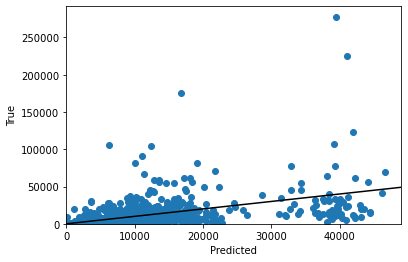

In [139]:
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y1_small)

In [148]:
offset = np.ones(len(set_vals))
x = np.concatenate((set_vals, offset.reshape(len(set_vals),1)), axis=1)

Size of dataset:  2434522
(19476, 11) (4869, 11)
(19476, 1) (4869, 1)
Train MSE	 444670594.5644545
Test MSE	 284342225.4018119


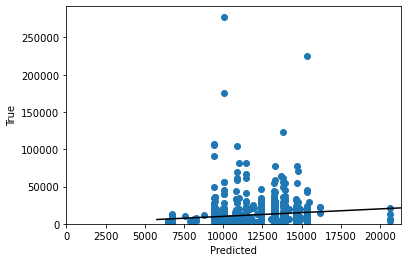

In [149]:
train_proportion = 0.8
n = len(x)
print('Size of dataset: ', str(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
t = int(train_proportion * n)
target = df[['Total_Costs']]
# the following variable records the features of examples in the training set
train_x = x[: t+1]
# the following variable records the features of examples in the test set
test_x = x[t+1 :]
# the following variable records the labels of examples in the training set
train_y = target[: t+1]
#print(train_y.shape)
# the following variable records the labels of examples in the test set
test_y = target[t+1 :]


data_sampling_ratio = 0.01
rand.seed(5741)
rows_to_sample = int(round(data_sampling_ratio * train_x.shape[0]))
idx_rows_to_sample = rand.sample(list(range(len(train_x))), rows_to_sample)

train_x_small = train_x[idx_rows_to_sample, :]
train_y_small = train_y.iloc[idx_rows_to_sample, :]

data_sampling_ratio = 0.01
rows_to_sample = int(round(data_sampling_ratio * test_x.shape[0]))
idx_rows_to_sample = rand.sample(list(range(len(test_x))), rows_to_sample)

test_x_small = test_x[idx_rows_to_sample, :]
test_y_small = test_y.iloc[idx_rows_to_sample, :]

print(train_x_small.shape, test_x_small.shape)
print(train_y_small.shape, test_y_small.shape)


train_y1_small = np.asarray(train_y_small)
test_y1_small = np.asarray(test_y_small)
train_x1_small = np.asarray(train_x_small)
test_x1_small = np.asarray(test_x_small)


train_MSE, test_MSE, test_pred = run_OLS(train_y1_small, test_y1_small, train_x1_small, test_x1_small )


print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y1_small)

In [152]:
offset = np.ones(len(cat_vals))
x = np.concatenate((cat_vals, offset.reshape(len(cat_vals),1)), axis=1)

Size of dataset:  2434522
(19476, 79) (4869, 79)
(19476, 1) (4869, 1)
Train MSE	 506420295.00808656
Test MSE	 349837619.67629105


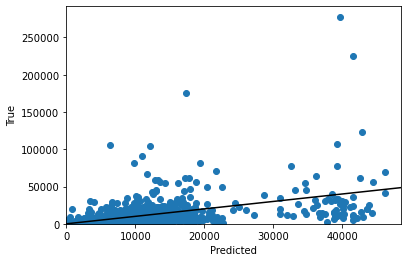

In [153]:
train_proportion = 0.8
n = len(x)
print('Size of dataset: ', str(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
t = int(train_proportion * n)
target = df[['Total_Costs']]
# the following variable records the features of examples in the training set
train_x = x[: t+1]
# the following variable records the features of examples in the test set
test_x = x[t+1 :]
# the following variable records the labels of examples in the training set
train_y = target[: t+1]
#print(train_y.shape)
# the following variable records the labels of examples in the test set
test_y = target[t+1 :]


data_sampling_ratio = 0.01
rand.seed(5741)
rows_to_sample = int(round(data_sampling_ratio * train_x.shape[0]))
idx_rows_to_sample = rand.sample(list(range(len(train_x))), rows_to_sample)

train_x_small = train_x[idx_rows_to_sample, :]
train_y_small = train_y.iloc[idx_rows_to_sample, :]

data_sampling_ratio = 0.01
rows_to_sample = int(round(data_sampling_ratio * test_x.shape[0]))
idx_rows_to_sample = rand.sample(list(range(len(test_x))), rows_to_sample)

test_x_small = test_x[idx_rows_to_sample, :]
test_y_small = test_y.iloc[idx_rows_to_sample, :]

print(train_x_small.shape, test_x_small.shape)
print(train_y_small.shape, test_y_small.shape)


train_y1_small = np.asarray(train_y_small)
test_y1_small = np.asarray(test_y_small)
train_x1_small = np.asarray(train_x_small)
test_x1_small = np.asarray(test_x_small)


train_MSE, test_MSE, test_pred = run_OLS(train_y1_small, test_y1_small, train_x1_small, test_x1_small )


print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y1_small)

In [154]:
offset = np.ones(len(nums))
x = np.concatenate((nums, offset.reshape(len(nums),1)), axis=1)

Size of dataset:  2434522
(19476, 2) (4869, 2)
(19476, 1) (4869, 1)
Train MSE	 682345093.040098
Test MSE	 482865918.36303514


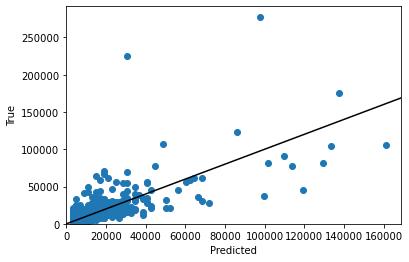

In [155]:
train_proportion = 0.8
n = len(x)
print('Size of dataset: ', str(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
t = int(train_proportion * n)
target = df[['Total_Costs']]
# the following variable records the features of examples in the training set
train_x = x[: t+1]
# the following variable records the features of examples in the test set
test_x = x[t+1 :]
# the following variable records the labels of examples in the training set
train_y = target[: t+1]
#print(train_y.shape)
# the following variable records the labels of examples in the test set
test_y = target[t+1 :]


data_sampling_ratio = 0.01
rand.seed(5741)
rows_to_sample = int(round(data_sampling_ratio * train_x.shape[0]))
idx_rows_to_sample = rand.sample(list(range(len(train_x))), rows_to_sample)

train_x_small = train_x[idx_rows_to_sample, :]
train_y_small = train_y.iloc[idx_rows_to_sample, :]

data_sampling_ratio = 0.01
rows_to_sample = int(round(data_sampling_ratio * test_x.shape[0]))
idx_rows_to_sample = rand.sample(list(range(len(test_x))), rows_to_sample)

test_x_small = test_x[idx_rows_to_sample, :]
test_y_small = test_y.iloc[idx_rows_to_sample, :]

print(train_x_small.shape, test_x_small.shape)
print(train_y_small.shape, test_y_small.shape)


train_y1_small = np.asarray(train_y_small)
test_y1_small = np.asarray(test_y_small)
train_x1_small = np.asarray(train_x_small)
test_x1_small = np.asarray(test_x_small)


train_MSE, test_MSE, test_pred = run_OLS(train_y1_small, test_y1_small, train_x1_small, test_x1_small )


print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y1_small)

In [156]:
offset = np.ones(len(cat_vals))
x = np.concatenate((cat_vals, 
                    cat_vals,
                    nums,
                    offset.reshape(len(cat_vals),1)), axis=1)

Size of dataset:  2434522
(19476, 158) (4869, 158)
(19476, 1) (4869, 1)
Train MSE	 692740834.0516478
Test MSE	 494320350.88283265


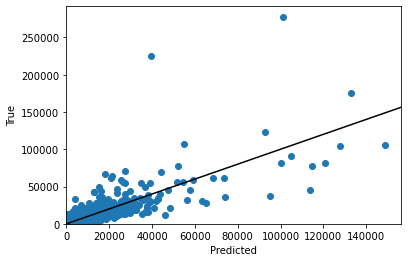

In [158]:
train_proportion = 0.8
n = len(x)
print('Size of dataset: ', str(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
t = int(train_proportion * n)
target = df[['Total_Costs']]
# the following variable records the features of examples in the training set
train_x = x[: t+1]
# the following variable records the features of examples in the test set
test_x = x[t+1 :]
# the following variable records the labels of examples in the training set
train_y = target[: t+1]
#print(train_y.shape)
# the following variable records the labels of examples in the test set
test_y = target[t+1 :]


data_sampling_ratio = 0.01
rand.seed(5741)
rows_to_sample = int(round(data_sampling_ratio * train_x.shape[0]))
idx_rows_to_sample = rand.sample(list(range(len(train_x))), rows_to_sample)

train_x_small = train_x[idx_rows_to_sample, :]
train_y_small = train_y.iloc[idx_rows_to_sample, :]

data_sampling_ratio = 0.01
rows_to_sample = int(round(data_sampling_ratio * test_x.shape[0]))
idx_rows_to_sample = rand.sample(list(range(len(test_x))), rows_to_sample)

test_x_small = test_x[idx_rows_to_sample, :]
test_y_small = test_y.iloc[idx_rows_to_sample, :]

print(train_x_small.shape, test_x_small.shape)
print(train_y_small.shape, test_y_small.shape)


train_y1_small = np.asarray(train_y_small)
test_y1_small = np.asarray(test_y_small)
train_x1_small = np.asarray(train_x_small)
test_x1_small = np.asarray(test_x_small)


train_MSE, test_MSE, test_pred = run_OLS(train_y1_small, test_y1_small, train_x1_small, test_x1_small )


print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y1_small)